<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E6%97%A5%E5%BF%97%E6%B5%81%E7%A8%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# 加载数据
file_path = '/content/log_message_counts.csv'  # 请替换为您的日志文件路径
df = pd.read_csv(file_path)

# 提取 log_message 列并去除 NaN 值
log_messages = df['log_message'].dropna().unique()

# 将 log_message 转换为 TF-IDF 向量
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
tfidf_matrix = vectorizer.fit_transform(log_messages)

# 定义聚类数量
num_clusters = 10  # 可根据需求调整

# 执行 K-Means 聚类
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_matrix)

# 获取每个 log_message 的聚类标签
cluster_labels = kmeans.labels_

# 找到距离每个聚类中心最近的 log_message
closest_points_idx, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
representative_logs = [log_messages[idx] for idx in closest_points_idx]

def extract_template_and_parameters(representative_log, logs_in_cluster):
    template = representative_log.split()
    parameters_list = []
    for log in logs_in_cluster:
        log_split = log.split()
        parameters = []
        matcher = difflib.SequenceMatcher(None, template, log_split)
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag == 'replace' or tag == 'delete':
                template[i1:i2] = ['{}']
                parameters.append(' '.join(log_split[j1:j2]))
            elif tag == 'insert':
                template.insert(i1, '{}')
                parameters.append(' '.join(log_split[j1:j2]))
        parameters_list.append(parameters)
    template_str = ' '.join(template)
    return {
        'template': template_str,
        'parameters_list': parameters_list
    }

# 对于每个聚类，提取模板和参数
templates_and_parameters = []
for label, representative_log in enumerate(representative_logs):
    logs_in_cluster = log_messages[cluster_labels == label].tolist()
    result = extract_template_and_parameters(representative_log, logs_in_cluster)
    templates_and_parameters.append({
        'cluster_label': label,
        'template': result['template'],
        'parameters_list': result['parameters_list']
    })

# 输出提取的模板和参数
for item in templates_and_parameters:
    print(f"Cluster Label: {item['cluster_label']}")
    print(f"Template: {item['template']}")
    print(f"Parameters: {item['parameters_list'][:2]}")  # 输出前两个参数列表作为示例
    print("------\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Label: 0
Template: KERNEL FATAL {}
Parameters: [['(softheader=009756d5 8bfa0003', 'PSR0=00001f01'], ['(softheader=0064588e 8aff0003', 'PSR0=00001f01 PSR1=00000000']]
------

Cluster Label: 1
Template: APP FATAL ciod: Error reading message prefix after LOGIN_MESSAGE on CioStream socket to {} Link has been severed
Parameters: [['172.16.96.116:49878:'], ['172.16.96.116:59907:']]
------

Cluster Label: 2
Template: KERNEL FATAL {} mount {}
Parameters: [['Error: unable to', 'filesystem'], ['Lustre', 'FAILED : bglio352 : point /p/gb1']]
------

Cluster Label: 3
Template: {} FATAL {}
Parameters: [['KERNEL', 'data TLB error interrupt'], ['KERNEL', 'data storage interrupt']]
------

Cluster Label: 4
Template: APP FATAL ciod: failed to read message prefix on control stream (CioStream socket to {}
Parameters: [['172.16.96.116:51621'], ['172.16.96.116:45492']]
------

Cluster Label: 5
Template: APP FATAL ciod: Error reading message prefix after {} on CioStream socket to {} Link has been sev

In [3]:
import pandas as pd
import difflib
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Load the dataset
file_path = '/content/log_message_counts.csv'  # 请替换为您的日志文件路径
df = pd.read_csv(file_path)

# Extract the log_message column and drop NaN values
log_messages = df['log_message'].dropna().unique()

# Convert the log messages to TF-IDF vectors
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
tfidf_matrix = vectorizer.fit_transform(log_messages)

# Define the number of clusters
num_clusters = 20  # Adjust as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each log message
cluster_labels = kmeans.labels_

# Find the log message that is closest to each cluster center
closest_points_idx, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
representative_logs = [log_messages[idx] for idx in closest_points_idx]

def extract_template_and_parameters(representative_log, logs_in_cluster):
    template = representative_log.split()
    parameters_list = []
    for log in logs_in_cluster:
        log_split = log.split()
        parameters = []
        matcher = difflib.SequenceMatcher(None, template, log_split)
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag == 'replace' or tag == 'delete':
                template[i1:i2] = ['{}']
                parameters.append(' '.join(log_split[j1:j2]))
            elif tag == 'insert':
                template.insert(i1, '{}')
                parameters.append(' '.join(log_split[j1:j2]))
        parameters_list.append(parameters)
    template_str = ' '.join(template)
    return {
        'template': template_str,
        'parameters_list': parameters_list
    }

# Extract templates and parameters for each cluster
templates_and_parameters = []
for label, representative_log in enumerate(representative_logs):
    logs_in_cluster = log_messages[cluster_labels == label].tolist()
    result = extract_template_and_parameters(representative_log, logs_in_cluster)
    templates_and_parameters.append({
        'cluster_label': label,
        'template': result['template'],
        'parameters_list': result['parameters_list']
    })

# Prepare DataFrames for saving to CSV
templates_df = pd.DataFrame([
    {
        'cluster_label': item['cluster_label'],
        'template': item['template'],
    }
    for item in templates_and_parameters
])

parameters_df = pd.DataFrame([
    {'cluster_label': item['cluster_label'], 'parameters': json.dumps(params)}
    for item in templates_and_parameters
    for params in item['parameters_list']
])

# Save the DataFrames to CSV files
templates_df.to_csv('templates.csv', index=False)
parameters_df.to_csv('parameters.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 使用t-SNE进行降维
tsne_model = TSNE(n_components=2, random_state=0)
low_dim_data = tsne_model.fit_transform(tfidf_matrix)

# 创建一个散点图来展示t-SNE的结果
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = low_dim_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend(loc='best')
plt.title('t-SNE Visualization of Log Message Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# 创建一个表格来展示每个聚类的模板
templates_df = pd.DataFrame({
    'Cluster Label': range(num_clusters),
    'Template': [templates_and_parameters[i]['template'] for i in range(num_clusters)]
})
print(templates_df)


TypeError: ignored

In [14]:
import pandas as pd
import difflib
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE

# Load the dataset
file_path = '/content/log_message_counts.csv'  # Replace with the path to your log file
df = pd.read_csv(file_path)

# Extract the log_message column and drop NaN values
log_messages = df['log_message'].dropna().unique()

# Convert the log messages to TF-IDF vectors
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
tfidf_matrix = vectorizer.fit_transform(log_messages)

# Define the number of clusters
num_clusters = 10  # Adjust as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each log message
cluster_labels = kmeans.labels_

# Find the log message that is closest to each cluster center
closest_points_idx, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, tfidf_matrix)
representative_logs = [log_messages[idx] for idx in closest_points_idx]

# Function to extract template and parameters
def extract_template_and_parameters(representative_log, logs_in_cluster):
    template = representative_log.split()
    parameters_list = []
    for log in logs_in_cluster:
        log_split = log.split()
        parameters = []
        matcher = difflib.SequenceMatcher(None, template, log_split)
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag == 'replace' or tag == 'delete':
                template[i1:i2] = ['{}']
                parameters.append(' '.join(log_split[j1:j2]))
            elif tag == 'insert':
                template.insert(i1, '{}')
                parameters.append(' '.join(log_split[j1:j2]))
        parameters_list.append(parameters)
    template_str = ' '.join(template)
    return {
        'template': template_str,
        'parameters_list': parameters_list
    }

# Extract templates and parameters for each cluster
templates_and_parameters = []
for label, representative_log in enumerate(representative_logs):
    logs_in_cluster = log_messages[cluster_labels == label].tolist()
    result = extract_template_and_parameters(representative_log, logs_in_cluster)
    templates_and_parameters.append({
        'cluster_label': label,
        'template': result['template'],
        'parameters_list': result['parameters_list']
    })

# Save the templates and parameters to CSV files
templates_df = pd.DataFrame([
    {
        'cluster_label': item['cluster_label'],
        'template': item['template'],
    }
    for item in templates_and_parameters
])
parameters_df = pd.DataFrame([
    {'cluster_label': item['cluster_label'], 'parameters': json.dumps(params)}
    for item in templates_and_parameters
    for params in item['parameters_list']
])
templates_df.to_csv('templates.csv', index=False)
parameters_df.to_csv('parameters.csv', index=False)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


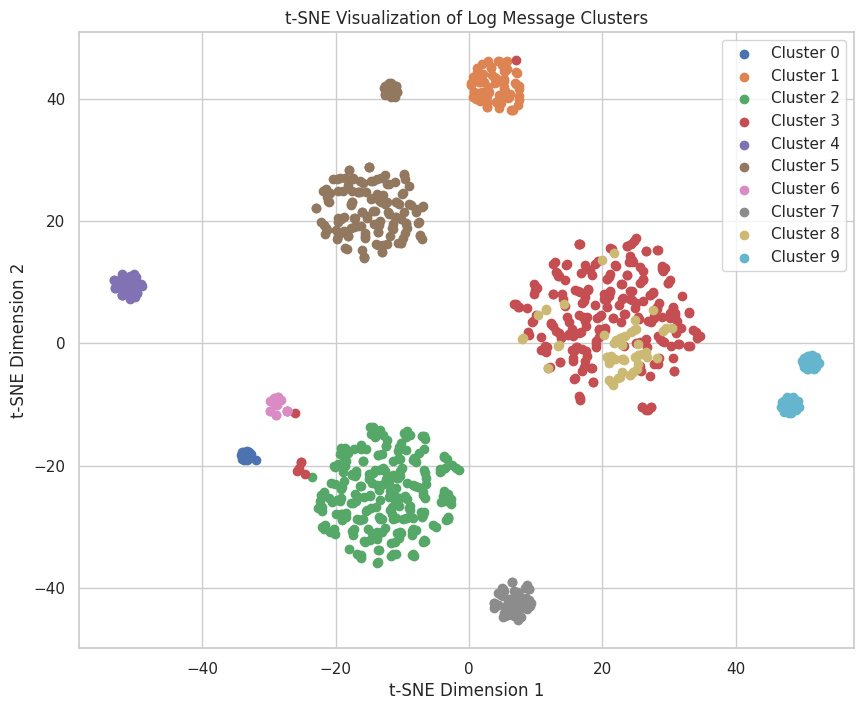

   cluster_label                                           template
0              0                                    KERNEL FATAL {}
1              1  APP FATAL ciod: Error reading message prefix a...
2              2                           KERNEL FATAL {} mount {}
3              3                                        {} FATAL {}
4              4  APP FATAL ciod: failed to read message prefix ...
5              5  APP FATAL ciod: Error reading message prefix a...
6              6  KERNEL FATAL rts: kernel terminated for reason {}
7              7  KERNEL FATAL Lustre mount FAILED : {} : block_...
8              8  APP FATAL ciod: Error reading message prefix o...
9              9  APP FATAL ciod: Error reading message prefix o...


In [15]:

# Visualize the clustering results using t-SNE
tsne_model = TSNE(n_components=2, random_state=0, init='random')  # Set init to 'random'
low_dim_data = tsne_model.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense

plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = low_dim_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend(loc='best')
plt.title('t-SNE Visualization of Log Message Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Print the templates for each cluster
print(templates_df)

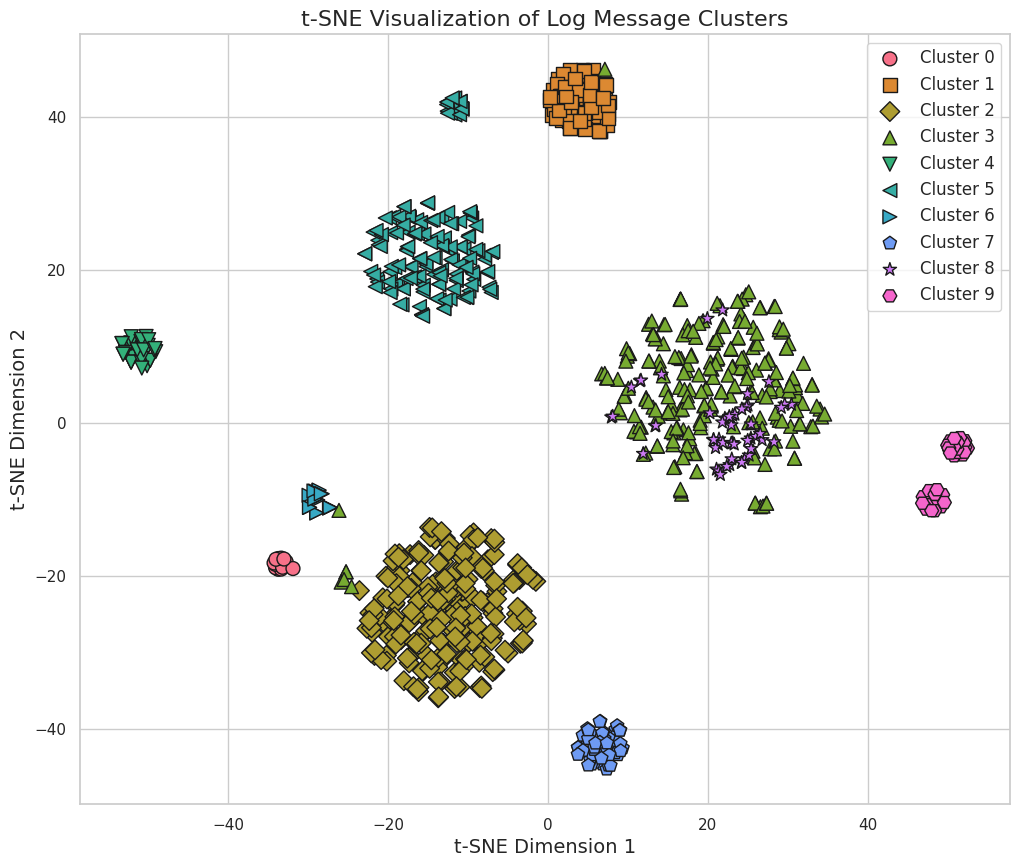

In [16]:
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 定义一组漂亮的颜色和标记样式
colors = sns.color_palette("husl", num_clusters)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']

plt.figure(figsize=(12, 10))

# 为每个聚类画散点图
for i in range(num_clusters):
    cluster_points = low_dim_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}',
                c=[colors[i]]*len(cluster_points), marker=markers[i], s=100, edgecolors='k')

# 添加标题和轴标签
plt.title('t-SNE Visualization of Log Message Clusters', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)

# 添加图例
plt.legend(loc='upper right', fontsize=12)

# 展示图形
plt.show()


您可以试试 Seaborn 的其他风格。Seaborn 提供了几种内置的主题，例如 darkgrid、whitegrid、dark、white 和 ticks。您可以根据自己的喜好选择不同的风格。下面是一个使用 darkgrid 风格的例子，这会产生一个有深色背景网格的图表：

风格：
darkgrid: 黑色背景的网格。
whitegrid: 白色背景的网格，通常用于带有很多颜色的图。
dark: 黑色背景，无网格。
white: 白色背景，无网格。
ticks: 白色背景，无网格，但有刻度线。
调色板：
Seaborn 还提供了多种预设的调色板，可以用于设置颜色。以下是一些常用的调色板：

deep
muted
bright
pastel
dark
colorblind
Set1, Set2, Set3

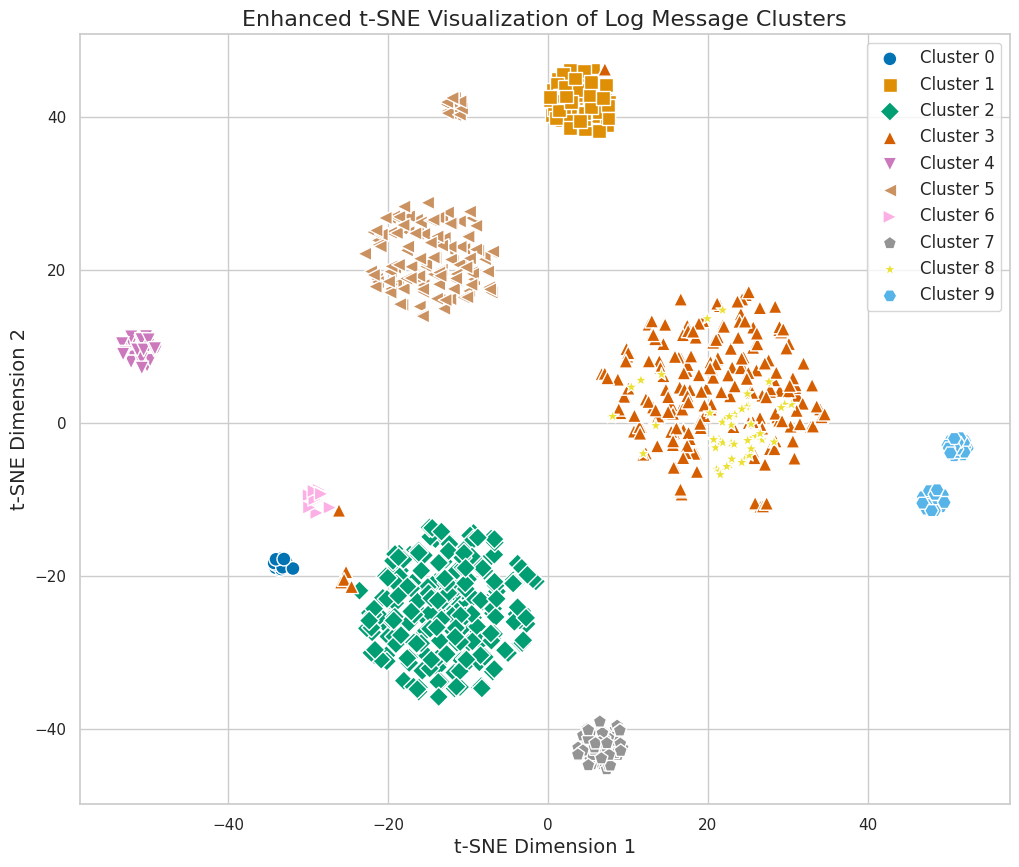

In [29]:
sns.set(style="whitegrid")
colors = sns.color_palette("colorblind", num_clusters)

# # 设置 Seaborn 风格为 'darkgrid'
# sns.set(style="dark")

# # 定义颜色和标记样式
# colors = sns.color_palette("Set2", num_clusters)  # 使用 Set2 调色板
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']

# 设置图表大小
plt.figure(figsize=(12, 10))

# 绘制每个聚类的散点图
for i in range(num_clusters):
    cluster_points = low_dim_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}',
                c=[colors[i]] * len(cluster_points), marker=markers[i], s=100, edgecolors='w')

# 设置标题和坐标轴标签
plt.title('Enhanced t-SNE Visualization of Log Message Clusters', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)

# 添加图例
plt.legend(loc='upper right', fontsize=12)

# 显示图表
plt.show()


In [31]:
from prettytable import PrettyTable

# 创建 PrettyTable 对象
table = PrettyTable()

# 定义表格的列名
table.field_names = ["Cluster Label", "Template"]

# 填充表格数据
for item in templates_and_parameters:
    table.add_row([item['cluster_label'], item['template']])

# 打印表格
print(table)


+---------------+------------------------------------------------------------------------------------------------------------------+
| Cluster Label |                                                     Template                                                     |
+---------------+------------------------------------------------------------------------------------------------------------------+
|       0       |                                                 KERNEL FATAL {}                                                  |
|       1       | APP FATAL ciod: Error reading message prefix after LOGIN_MESSAGE on CioStream socket to {} Link has been severed |
|       2       |                                             KERNEL FATAL {} mount {}                                             |
|       3       |                                                   {} FATAL {}                                                    |
|       4       |             APP FATAL ciod: failed to read message 

In [ ]:
import matplotlib.pyplot as plt

# 遍历每个聚类和其参数
for item in templates_and_parameters:
    cluster_label = item['cluster_label']
    parameters_list = item['parameters_list']

    # 如果参数列表为空，则跳过
    if not parameters_list:
        continue

    # 对每个参数创建直方图
    for param_index in range(len(parameters_list[0])):
        # 提取并编码参数
        param_values = [params[param_index] for params in parameters_list if len(params) > param_index]
        unique_values = list(set(param_values))
        value_to_index = {value: index for index, value in enumerate(unique_values)}
        encoded_values = [value_to_index[value] for value in param_values]

        # 创建直方图
        plt.figure(figsize=(10, 6))
        plt.hist(encoded_values, bins=len(unique_values), color=colors[cluster_label % len(colors)], edgecolor='k')
        plt.xticks(ticks=range(len(unique_values)), labels=unique_values, rotation=45, ha='right')
        plt.title(f'Parameter {param_index + 1} Distribution for Cluster {cluster_label}')
        plt.xlabel('Parameter Value')
        plt.ylabel('Frequency')
        plt.tight_layout()  # 确保标签完全可见
        plt.show()


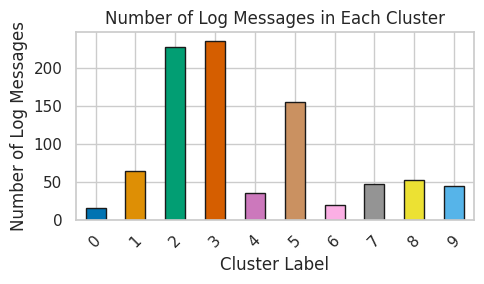

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 计算每个聚类中的日志数量
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()

# 创建条形图
plt.figure(figsize=(5, 3))
cluster_sizes.plot(kind='bar', color=sns.color_palette("colorblind", num_clusters), edgecolor='k')
plt.title('Number of Log Messages in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Log Messages')
plt.xticks(rotation=45)
plt.tight_layout()  # 确保标签完全可见
plt.show()
